In [1]:
import numpy as np
import json
from pprint import pprint

from collections import defaultdict
import operator

import matplotlib.pyplot as plt; plt.rcdefaults()


import seaborn as sns

import sys
sys.path.append('../src')
import os
from tqdm import tqdm
from utils import rad2degree
from panoramic_camera import PanoramicCamera as camera

In [2]:
def calculateDistance(gt_lat,gt_lng,pr_lat,pr_lng):
  return ((gt_lat - pr_lat)**2 + (gt_lng  - pr_lng)**2)**0.5

In [7]:
def showActionInstance(instance):

  image_path = instance['img_src']
  
  center = instance['act_deg_list'][-1][-1]
  center_longitude, center_latitude = center
  gt_longitude, gt_latitude  = instance['gt_longitude'],instance['gt_latitude']
  pred_longitude,pred_latitude = instance['pred_xlng_deg'],instance['pred_ylat_deg']
  
  cam = camera(output_image_shape=(400,400)) 
  cam.load_img(image_path)
  cam.look(center_longitude,center_latitude)

  gt_coors = cam.get_image_coordinate_for(gt_longitude,gt_latitude)
  pred_coors = cam.get_image_coordinate_for(pred_longitude,pred_latitude)

  fov = cam.get_image()
  size = 5

  fov[gt_coors[0]-size:gt_coors[0]+size,gt_coors[1]-size:gt_coors[1]+size,0] = 255.
  fov[gt_coors[0]-size:gt_coors[0]+size,gt_coors[1]-size:gt_coors[1]+size,1:] = 0

  fov[pred_coors[0]-size:pred_coors[0]+size,pred_coors[1]-size:pred_coors[1]+size,-1] = 255.
  fov[pred_coors[0]-size:pred_coors[0]+size,pred_coors[1]-size:pred_coors[1]+size,:-1] = 0

  plt.imshow(fov)

  degree_dist = calculateDistance(gt_latitude, gt_longitude, pred_latitude, pred_longitude)
  pixel_distance = calculateDistance(gt_coors[1], gt_coors[0], pred_coors[1], pred_coors[0])

  print('center coordinates [lon,lat](RED):',center_longitude,center_latitude)
  print('ground truth coordinates [lon,lat](RED):',gt_longitude,gt_latitude)
  print('predicted coordinates [lon,lat](BLUE):',pred_longitude,pred_latitude)
  
  print('ground truth coordinates [y,x](RED):',gt_coors)
  print('predicted coordinates [y,x](BLUE):',pred_coors)
  print('Degrees {} Pixels {}'.format(degree_dist,pixel_distance))

In [8]:
data = json.load(open('../../data/train.json'))

In [9]:
act_instances = {}
for instance in data:
  for action in instance['actions']:
    action['gt_longitude'] = instance['xlng_deg']
    action['gt_latitude'] = instance['ylat_deg']
    action['img_src'] = instance['img_src']
    
    act_instances[action['actionid']] = action
      

center coordinates [lon,lat](RED): -63.99215088197491 21.71128170093481
ground truth coordinates [lon,lat](RED): -63.99215088197491 21.711281700934812
predicted coordinates [lon,lat](BLUE): -62.739238395780774 22.207673485400573
ground truth coordinates [y,x](RED): (200, 200)
predicted coordinates [y,x](BLUE): (198, 204)
Degrees 1.347662606792319 Pixels 4.47213595499958


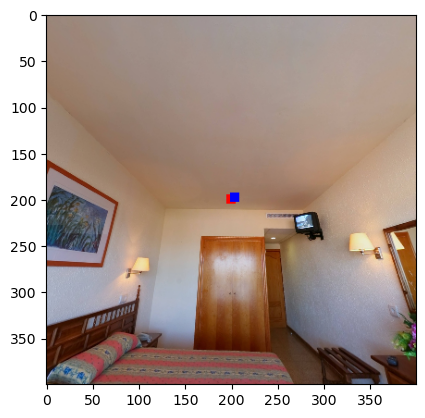

In [16]:
showActionInstance(act_instances[2404])

In [ ]:
pprint(data[8351])

In [ ]:
pprint(act_instances[2574])